## 1) Load Libraries

In [11]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split   # Added
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## 2) Load the Iris dataset

In [12]:
iris= load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 3) Split Dataset into Features (X) and Target (y)

In [13]:
X = df.drop('target', axis=1)  # features
y = df['target']              # target labels

## 4) Split Data into Training and Testing Sets

In [14]:
# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5) Train KNN with different values of k

In [15]:
k_values = [1, 3, 5, 7]
knn_accuracies = []

In [16]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"K={k} → Accuracy: {acc:.3f}")

K=1 → Accuracy: 1.000
K=3 → Accuracy: 1.000
K=5 → Accuracy: 1.000
K=7 → Accuracy: 0.967


## 6) Plot Accuracy vs K for Model Evaluation

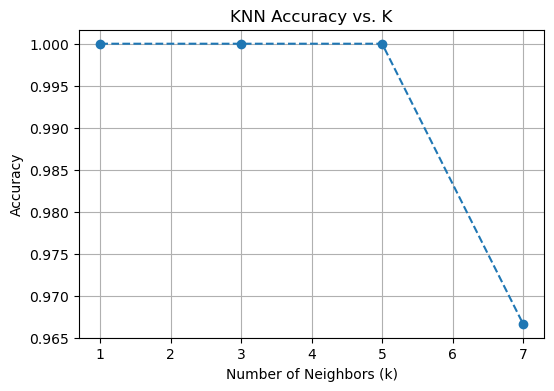

In [17]:
# 4. Plot accuracy vs k
plt.figure(figsize=(6,4))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='--')
plt.title("KNN Accuracy vs. K")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## 7) Train and Evaluate Logistic Regression for Comparison

In [18]:
# 5. Compare with Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)

In [19]:
print(f"Logistic Regression Accuracy: {log_acc:.3f}")

Logistic Regression Accuracy: 1.000
